<a href="https://colab.research.google.com/github/RedBatProject/Roshan-Project/blob/main/keyword_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch as t
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Roshan Project/d/data_cleaned_17.csv')
df.columns

Index(['Unnamed: 0', 'body', 'keywords', 'cleaned_body', 'textRank',
       'singleRank', 'topicRank', 'tf-idf', 'tf-idf-1', 'positionRank',
       'multipartiteRank', 'yake', 'NOUN_ADJ', 'NOUN_ADJ_2', 'roshan',
       'cleaned_roshan', 'bigthan0', 'bigthan1', 'bigthan2', 'bigthan3',
       'bigthan4', 'bigthan5', 'bigthan6'],
      dtype='object')

In [4]:
# df = df[0:50]
df = df[['NOUN_ADJ', 'keywords', 'cleaned_body']]

In [5]:
split_keywords = []
split_body = []
for body,keywords in zip(df['NOUN_ADJ'],df['keywords']):
    for keyword in keywords.split(','):
        split_keywords.append(keyword)
        split_body.append(body)


In [6]:
keywords_mean_len = []
for keyword in split_keywords:
    keywords_mean_len.append(len(keyword.split()))
print(np.mean(keywords_mean_len))

2.1344348479158843


In [7]:
df2 = pd.DataFrame()
df2['text'] = split_body
df2['keywords'] =  split_keywords

In [8]:
df2['text'][0]

'نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اثر شیخ صدوق ره روش مبانی دست پژوهش عمل کنکاش روایات نتیجه ذیل حاصل شیخ صدوق ره حیطه مبانی حیطه روش سبک بیانی تبیینی بیان مطالب فقه الحدیثی مواقعی صدوق ره مبانی روش های فقه الحدیثی نقل روایت بیان توضیح اضافاتی مسکوت می حکایت مبانی روش بیانی پاره ای مواقع بیانات اضافات دنبال روایت قید می مبانی روش تبیینی نظر جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد عصمت علم انبیاء امه اطهار علیهم السلام تقدم نص عقل حفظ جایگاه عقل پذیرش رد روایات اعتقاد لزوم تقیه می تشکیل خانواده حدیثی چینش هندسی روایات تفسیر روایات قرآن روایات عنوان نمونه موارد روش های فقه الحدیثی نویسنده ذکر شواهدی راستا میداتی نتایج علمی اراه مهمترین نتایچ پژوهش مقوله ای بدیع مطابقت مبانی شیخ صدوق روش فقه الحدیثی توجه روش شیخ صدوق چینش هندسی روایات لحاظ محتوا سند هچنین ابواب ابعاد علمی سبک زیبای فقه الحدیثی نمایان می نقش شیخ صدوق تقریب مذاهب دفاع مقام ولایت امامت مذهب حقه شیعه جدال احسن مواردی شیخ صدوق رسیدن مقصود تلاش'

In [9]:
# /2146

In [10]:
# sorted(keywords_mean_len)

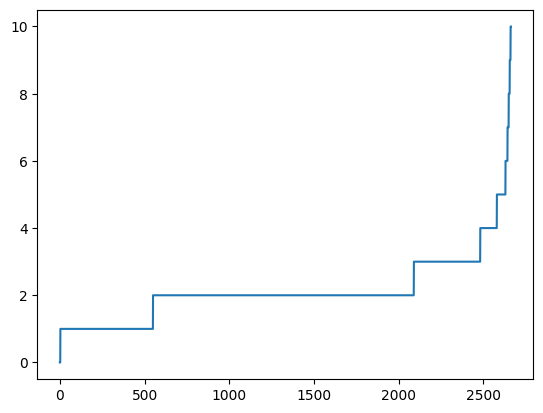

In [11]:
plt.plot(range(len(keywords_mean_len)),sorted(keywords_mean_len))

In [12]:
words = []
for sentence in df['NOUN_ADJ']:
    for word in sentence.split():
        words.append(word)


In [13]:
words[0:10]

['نوشتار',
 'بررسی',
 'فقه',
 'الحدیثی',
 'کتاب',
 'معانی',
 'الاخبار',
 'اثر',
 'شیخ',
 'صدوق']

In [14]:
from collections import Counter

In [15]:
# Counter(words)

In [16]:
wtoi = {}
for i,w in enumerate(list(set(words))):
    wtoi[w] = i+1

In [17]:
np.max(list(wtoi.values()))

9958

In [18]:
itow = {j:i for i,j in wtoi.items()}

In [19]:
# itow

In [20]:
dflen = df2['text'].str.split().apply(len)
dflen_keys = df2['keywords'].str.split().apply(len)


In [21]:
dflen_keys

0       2
1       2
2       3
3       3
4       2
       ..
2658    1
2659    2
2660    2
2661    5
2662    3
Name: keywords, Length: 2663, dtype: int64

In [22]:
maxlen = dflen.max()
dflen_key = dflen_keys.max()

In [23]:
dflen_key,maxlen

(10, 479)

In [24]:
sentencestoi = []

for sentence in df2['text']:
    sentencetoi = []
    for word in sentence.split():
        sentencetoi.append(wtoi[word])
    sentencestoi.append(sentencetoi)

In [25]:
for i,sentence in enumerate(sentencestoi):
    while len(sentencestoi[i]) < maxlen:
        sentencestoi[i].append(0)

In [26]:
sentencestoi = np.array(sentencestoi)

In [27]:
keywordstoi = []
for keyword in df2['keywords']:
    keywordtoi = []
    for key in keyword.split():
        try:
            keywordtoi.append(wtoi[key])
        except:
            pass
    keywordstoi.append(keywordtoi)

In [28]:
# keywordstoi

In [29]:
for i,keys in enumerate(keywordstoi):
    while len(keywordstoi[i]) < dflen_key:
        keywordstoi[i].append(0)

In [30]:
# keywordstoi

In [31]:
keywordstoi = np.array(keywordstoi)

In [32]:
keywordstoi.shape,sentencestoi.shape

((2663, 10), (2663, 479))

In [33]:
keywordstoi

array([[4924,  690,    0, ...,    0,    0,    0],
       [1365, 5763,    0, ...,    0,    0,    0],
       [6578, 4924, 8406, ...,    0,    0,    0],
       ...,
       [4037, 2244,    0, ...,    0,    0,    0],
       [9377, 5629, 4989, ...,    0,    0,    0],
       [5197, 2244, 4899, ...,    0,    0,    0]])

# new data

In [34]:
textlist = []
keylist = []
for texts,keys in zip(df2['text'],df2['keywords']):
    if f' {keys} ' in texts and len(keys) > 1:
        # if keys not in keylist:
            # print('True',keys)
        textlist.append(texts)
        keylist.append(keys)
    else:
        pass
        # print('False',keys)

In [35]:
fil = pd.DataFrame()
fil['text'] = textlist
fil['key'] = keylist
fil

,text,key
0,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,معانی الاخبار
1,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,روش فقه الحدیثی
2,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,چینش هندسی روایات
3,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,شیخ صدوق
4,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,مبانی فقه الحدیثی
...,...,...
1879,هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...,رفتار شهروندی سازمانی
1880,هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...,تواضع
1881,هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...,کیفیت زندگی کاری
1882,هدف پژوهش حاضر تبیین رابطه بین جهت گیری زندگی ...,کارکنان


In [36]:
fil.to_csv('/content/drive/MyDrive/Roshan Project/keywords extraction/newdata.csv',index=False)


In [37]:
df2 = pd.read_csv('/content/drive/MyDrive/Roshan Project/keywords extraction/newdata.csv')
df2

,text,key
0,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,معانی الاخبار
1,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,روش فقه الحدیثی
2,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,چینش هندسی روایات
3,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,شیخ صدوق
4,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار اث...,مبانی فقه الحدیثی
...,...,...
1879,هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...,رفتار شهروندی سازمانی
1880,هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...,تواضع
1881,هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...,کیفیت زندگی کاری
1882,هدف پژوهش حاضر تبیین رابطه بین جهت گیری زندگی ...,کارکنان


In [38]:
df2['key']

0               معانی الاخبار
1             روش فقه الحدیثی
2           چینش هندسی روایات
3                    شیخ صدوق
4           مبانی فقه الحدیثی
                ...          
1879    رفتار شهروندی سازمانی
1880                    تواضع
1881         کیفیت زندگی کاری
1882                  کارکنان
1883         کیفیت زندگی کاری
Name: key, Length: 1884, dtype: object

In [39]:
df2['len'] = df2['key'].str.split().apply(len)

In [40]:
df2['len'].mean()

1.9548832271762209

In [41]:
df2 = df2[0:50]

# start sklearn

In [266]:
from sklearn.feature_extraction.text import CountVectorizer

In [268]:
vectorizer2 = CountVectorizer(min_df=3 ,ngram_range=(1, 3))

In [269]:
X = vectorizer2.fit_transform(df2['text'])

In [270]:
x = X.toarray()

In [271]:
vectorizer2.get_feature_names_out()

array(['آباد', 'آباد غرب', 'آباد غرب انجام', ..., 'یی', 'یی یسن',
       'یی یسن چن'], dtype=object)

In [272]:
wordindex = vectorizer2.vocabulary_

In [273]:
# wordindex

In [274]:
y = vectorizer2.transform(df2['key'])
y = y.toarray()

In [275]:
# g = vectorizer2.transform(df2['key'][0:1]).toarray()

In [276]:
# df2['key'][0:1]

In [277]:
g

In [278]:
x[np.where(x>1)] = 1
y[np.where(y>1)] = 1


In [279]:
x = t.tensor(x).float()
y = t.tensor(y).float()

In [280]:
y_ = t.zeros((y.shape[0],1))

In [281]:
for i,j in enumerate(y):
    y_[i] = j.argmax()

In [282]:
y.shape

torch.Size([50, 4499])

In [283]:
# m = embed.shape[1] * embed.shape[2]
m = x.shape[1]
w1 = t.randn(m,100)
b1 = t.randn(100)

In [284]:
x.shape

torch.Size([50, 4499])

In [285]:
w1.shape

torch.Size([4499, 100])

In [286]:
x.shape,w1.shape

(torch.Size([50, 4499]), torch.Size([4499, 100]))

In [287]:
x @ w1

tensor([[  3.5319, -15.6182,  35.5435,  ...,  -0.7687,  -3.7077, -15.1844],
        [  3.5319, -15.6182,  35.5435,  ...,  -0.7687,  -3.7077, -15.1844],
        [  3.5319, -15.6182,  35.5435,  ...,  -0.7687,  -3.7077, -15.1844],
        ...,
        [ -8.2826, -11.8917,   2.1256,  ..., -48.3975,  10.3715,  21.8827],
        [ -8.2826, -11.8917,   2.1256,  ..., -48.3975,  10.3715,  21.8827],
        [ -8.2826, -11.8917,   2.1256,  ..., -48.3975,  10.3715,  21.8827]])

In [288]:
h1 = t.tanh((x @ w1)+ b1)
h1

tensor([[ 0.9997, -1.0000,  1.0000,  ..., -0.0672, -0.9991, -1.0000],
        [ 0.9997, -1.0000,  1.0000,  ..., -0.0672, -0.9991, -1.0000],
        [ 0.9997, -1.0000,  1.0000,  ..., -0.0672, -0.9991, -1.0000],
        ...,
        [-1.0000, -1.0000,  0.9992,  ..., -1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000,  0.9992,  ..., -1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000,  0.9992,  ..., -1.0000,  1.0000,  1.0000]])

In [289]:
h1.shape

torch.Size([50, 100])

In [290]:
w2 = t.randn((100,x.shape[1]))
b2 = t.randn(x.shape[1])

In [291]:
logits = h1 @ w2 + b2

In [292]:
logits.shape

torch.Size([50, 4499])

In [293]:
counts = logits.exp()
counts

tensor([[2.6414e+01, 4.4338e-01, 5.4963e+03,  ..., 2.0485e-02, 4.0315e+00,
         8.3667e-02],
        [2.6414e+01, 4.4338e-01, 5.4963e+03,  ..., 2.0485e-02, 4.0315e+00,
         8.3667e-02],
        [2.6414e+01, 4.4338e-01, 5.4963e+03,  ..., 2.0485e-02, 4.0315e+00,
         8.3667e-02],
        ...,
        [5.6376e-13, 9.9383e-01, 1.3754e-01,  ..., 3.3299e-02, 7.9529e+03,
         2.7192e+07],
        [5.6376e-13, 9.9383e-01, 1.3754e-01,  ..., 3.3299e-02, 7.9529e+03,
         2.7192e+07],
        [5.6376e-13, 9.9383e-01, 1.3754e-01,  ..., 3.3299e-02, 7.9529e+03,
         2.7192e+07]])

In [296]:
prob = counts / counts.sum(1, keepdims=True)

In [297]:
prob

tensor([[2.2943e-15, 3.8513e-17, 4.7742e-13,  ..., 1.7793e-18, 3.5019e-16,
         7.2675e-18],
        [2.2943e-15, 3.8513e-17, 4.7742e-13,  ..., 1.7793e-18, 3.5019e-16,
         7.2675e-18],
        [2.2943e-15, 3.8513e-17, 4.7742e-13,  ..., 1.7793e-18, 3.5019e-16,
         7.2675e-18],
        ...,
        [8.2511e-31, 1.4546e-18, 2.0131e-19,  ..., 4.8736e-20, 1.1640e-14,
         3.9797e-11],
        [8.2511e-31, 1.4545e-18, 2.0131e-19,  ..., 4.8736e-20, 1.1640e-14,
         3.9797e-11],
        [8.2511e-31, 1.4545e-18, 2.0131e-19,  ..., 4.8736e-20, 1.1640e-14,
         3.9797e-11]])

In [298]:
prob.shape,y.shape

(torch.Size([50, 4499]), torch.Size([50, 4499]))

In [299]:
# t.sum(t.tensor([[1,1,1],[1,1,1],[1,1,1]]) @ t.tensor([[1,1,1],[1,1,1],[1,1,1]]))

In [300]:
# prob[0] = y[0]

In [301]:
prob

tensor([[2.2943e-15, 3.8513e-17, 4.7742e-13,  ..., 1.7793e-18, 3.5019e-16,
         7.2675e-18],
        [2.2943e-15, 3.8513e-17, 4.7742e-13,  ..., 1.7793e-18, 3.5019e-16,
         7.2675e-18],
        [2.2943e-15, 3.8513e-17, 4.7742e-13,  ..., 1.7793e-18, 3.5019e-16,
         7.2675e-18],
        ...,
        [8.2511e-31, 1.4546e-18, 2.0131e-19,  ..., 4.8736e-20, 1.1640e-14,
         3.9797e-11],
        [8.2511e-31, 1.4545e-18, 2.0131e-19,  ..., 4.8736e-20, 1.1640e-14,
         3.9797e-11],
        [8.2511e-31, 1.4545e-18, 2.0131e-19,  ..., 4.8736e-20, 1.1640e-14,
         3.9797e-11]])

In [302]:
y[0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [303]:
y.shape

torch.Size([50, 4499])

In [304]:
(prob*y).sum()

tensor(5.0145e-05)

In [313]:
(y * y).sum((1))

tensor([ 3.,  6.,  6.,  3.,  6.,  6.,  6.,  3.,  6.,  2.,  1.,  3.,  1.,  1.,
         1.,  3.,  1.,  3.,  3.,  2.,  3.,  3.,  3.,  3.,  6.,  3.,  3.,  3.,
         3.,  1.,  3., 12.,  6.,  3.,  3.,  1.,  3.,  3.,  3.,  3.,  1.,  3.,
         6.,  1.,  3.,  3.,  1.,  1.,  6.,  6.])

In [172]:
-((prob[0] * y[0]) + 1e-8).log().mean()

tensor(18.4207, grad_fn=<NegBackward0>)

In [154]:
loss = -((prob+1e-8) * y).mean().log()

In [155]:
# loss = -(prob * y).mean().log().mean()
# loss

In [156]:
# loss = -(prob * y).mean().log() + (prob @ prob.T).sum()
# loss

In [314]:
g = t.Generator().manual_seed(123123)
m = x.shape[1]
w1 = t.randn(m,100)
b1 = t.randn(100)
w2 = t.randn((100,x.shape[1]))
b2 = t.randn(x.shape[1])
parameters = [w1,w2,b1,b2]

In [315]:
sum(p.nelement() for p in parameters)

904399

In [316]:
for p in parameters:
    p.requires_grad = True

In [317]:
# (x @ w1).max().item()

In [ ]:
for _ in range(1000):
    # forword
    h1 = t.tanh((x @ w1)+ b1)
    logits = h1 @ w2 + b2
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdims=True)
    # loss = -(prob * y).mean().log() + (prob @ prob.T).sum()
    loss = (prob*y).sum()
# loss
    print(loss.item())
    # backward
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += 2* p.grad

0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999973773956299
0.9999974370002747
0.9999974370002747
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966049194
0.9999974966

In [ ]:
for i in range(y.shape[0]):
    print((prob[i] * y[i]).sum())

In [224]:
prob[13].argmax()

tensor(315)

In [226]:
y.sum((1))

tensor([ 3.,  6.,  6.,  3.,  6.,  6.,  6.,  3.,  6.,  3.,  3.,  3.,  1.,  1.,
         1.,  3.,  1.,  3.,  3.,  2.,  3.,  3.,  3.,  3.,  6.,  3.,  3.,  3.,
         3.,  1.,  3., 12.,  6.,  3.,  3.,  1.,  3.,  3.,  3.,  3.,  1.,  3.,
         6.,  1.,  3.,  3.,  1.,  1.,  6.,  6.])

# end

In [ ]:
g = t.Generator().manual_seed(123123)

In [ ]:
C = t.randn((np.max(list(wtoi.values()))+1,2),generator=g)

In [ ]:
# xtr,ytr,xva,yva = sentencestoi[0:200], keywordstoi[0:200],sentencestoi[200:], keywordstoi[200:]

In [ ]:
# xtr.shape

(90, 485)

In [ ]:
# C[xtr].shape[1]

485

In [ ]:
# embed = C[xtr]

In [ ]:
# m = embed.shape[1] * embed.shape[2]
m = x.shape[1]
w1 = t.randn(m,100)
b1 = t.randn(100)

In [ ]:
w1

tensor([[ 0.8219,  1.6563, -0.3728,  ..., -0.2972,  1.3428,  0.8600],
        [ 0.2956,  0.6894, -1.3430,  ...,  1.1880,  0.7666, -0.4375],
        [ 0.1818,  0.0613,  0.0638,  ..., -0.8759,  0.7356,  0.2571],
        ...,
        [ 0.7417, -1.6472,  1.9241,  ...,  0.2372, -0.7720,  1.4620],
        [ 1.0619,  1.2266, -0.6172,  ..., -0.0421,  0.4968,  1.3983],
        [-0.2746, -0.6542,  1.1550,  ..., -0.5001,  0.4979, -0.5875]])

In [ ]:
w1.shape

torch.Size([8047, 100])

In [ ]:
h1 = t.tanh(x @ w1 + b1)
h1

In [ ]:
w2 = t.randn((100,np.max(list(wtoi.values()))+1))
b2 = t.randn(np.max(list(wtoi.values()))+1)

In [ ]:
logits = h1 @ w2 + b2

In [ ]:
logits.shape

torch.Size([90, 1262])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob.shape

torch.Size([90, 1262])

In [ ]:
prob[0]

tensor([6.2145e-18, 3.3509e-14, 1.0166e-13,  ..., 8.6480e-15, 2.1248e-17,
        1.1600e-10])

In [ ]:
prob[0].shape

torch.Size([1262])

In [ ]:
ytrs = t.zeros((90,prob[0].shape[0]))
for i,j in enumerate(ytrs):
    for k in ytr[i]:
        if k > 0:
            ytrs[i][k] = 1



In [ ]:
# del log

In [ ]:
prob.shape

torch.Size([90, 1262])

In [ ]:
ytrs.shape

torch.Size([90, 1262])

In [ ]:
g = t.Generator().manual_seed(123123)
C = t.randn((np.max(list(wtoi.values()))+1,2),generator=g)
m = embed.shape[1] * embed.shape[2]
w1 = t.randn(m,100)
b1 = t.randn(100)

# h1
w2 = t.randn((100,np.max(list(wtoi.values()))+1))
b2 = t.randn(np.max(list(wtoi.values()))+1)
parameters = [C,w1,w2,b1,b2]

In [ ]:
sum(p.nelement() for p in parameters)

227086

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
# s = t.max((ytrs * prob))
s = 1e-3
s

0.001

In [ ]:
ytrs += 1e-9

In [ ]:
# prob[0][168] = 1

In [ ]:
loss = -(ytrs * prob).log().mean()
loss

tensor(54.3600)

In [ ]:
# -((ytrs * prob) + s).log().mean()

In [ ]:
for _ in range(10000):
    # forword
    embed = C[xtr]
    h1 = t.tanh(embed.view(-1,2*485) @ w1 + b1)
    logits = h1 @ w2 + b2
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdims=True)
    loss = -((ytrs * prob)).log().mean()
# loss
    print(loss.item())
    # backward
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -10 * p.grad